In [1]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
kerapu = pd.read_csv("kerapu.csv", sep = ';')
kerapu.head()

,jenis,Kedalaman,Panjang,Berat,Tinggi,Lebar
0,E_ongus,5.0,22.7,150.0,8.6,2.8
1,E_ongus,5.0,24.7,170.0,9.8,3.2
2,E_ongus,7.0,22.5,148.0,8.4,2.8
3,E_ongus,5.0,22.6,151.0,8.5,2.8
4,E_ongus,8.0,23.5,163.0,9.0,2.8


In [3]:
kerapu.tail()

,jenis,Kedalaman,Panjang,Berat,Tinggi,Lebar
46,E_areolatus,25.0,26.8,231.0,8.5,3.5
47,E_areolatus,25.0,29.8,251.0,10.4,3.8
48,E_areolatus,20.0,29.6,257.0,10.2,3.8
49,E_areolatus,20.0,28.4,247.0,9.5,3.8
50,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
kerapu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
jenis        50 non-null object
Kedalaman    50 non-null float64
Panjang      50 non-null float64
Berat        50 non-null float64
Tinggi       50 non-null float64
Lebar        50 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [5]:
print(kerapu.isnull().sum())

jenis        1
Kedalaman    1
Panjang      1
Berat        1
Tinggi       1
Lebar        1
dtype: int64


In [6]:
X = kerapu.dropna()
kerapu.dropna(inplace=True)

In [7]:
kerapu.tail()

,jenis,Kedalaman,Panjang,Berat,Tinggi,Lebar
45,E_areolatus,25.0,27.9,239.0,9.0,3.6
46,E_areolatus,25.0,26.8,231.0,8.5,3.5
47,E_areolatus,25.0,29.8,251.0,10.4,3.8
48,E_areolatus,20.0,29.6,257.0,10.2,3.8
49,E_areolatus,20.0,28.4,247.0,9.5,3.8


In [8]:
kerapu.describe()

,Kedalaman,Panjang,Berat,Tinggi,Lebar
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,15.960000,28.670000,278.400000,10.330000,3.752000
std,7.359459,4.899323,129.063503,2.476028,0.805147
min,3.000000,20.800000,130.000000,7.500000,2.300000
25%,10.000000,25.975000,221.500000,8.600000,3.225000
50%,15.500000,28.100000,241.000000,9.350000,3.750000
75%,20.000000,29.875000,258.000000,10.575000,4.000000
max,30.000000,40.200000,560.000000,16.100000,5.800000


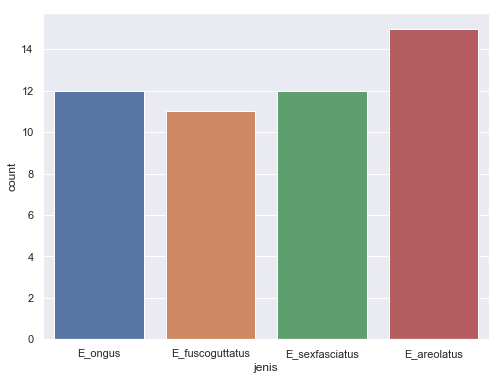

In [9]:
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="jenis", data=kerapu)

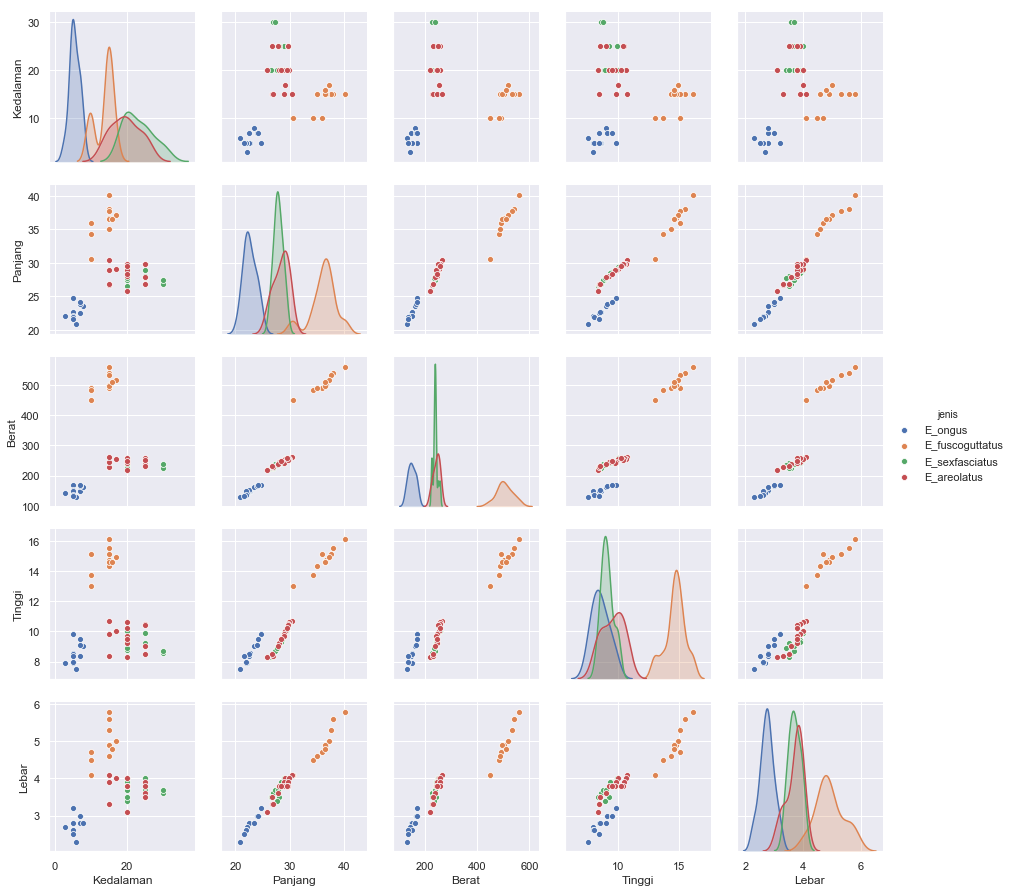

In [10]:
p = sns.pairplot(kerapu, kind='scatter', hue="jenis")
plt.savefig('pairplot kerapu.png')

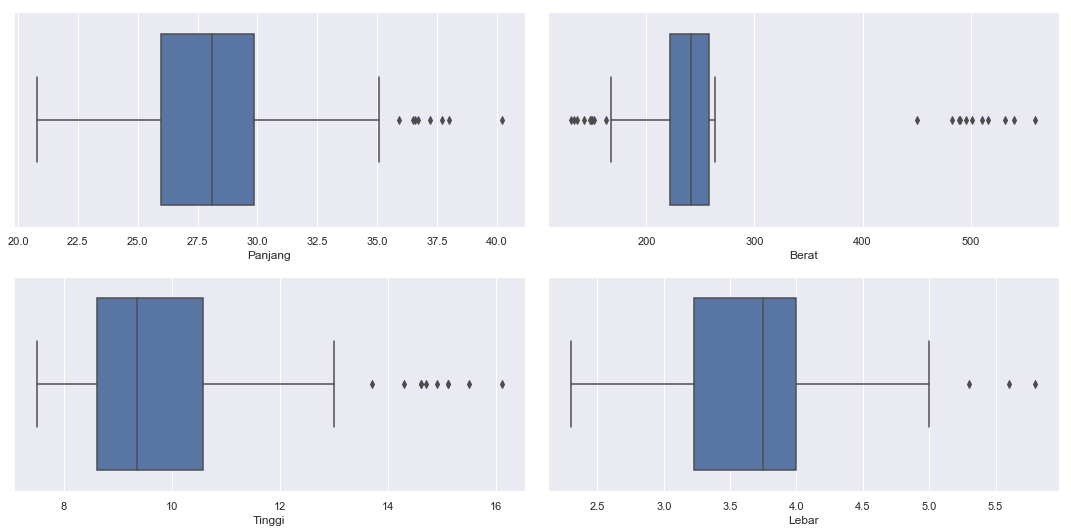

In [11]:
fig, axs = plt.subplots(2,2, figsize = (15,7.5))
plt1 = sns.boxplot(kerapu['Panjang'], ax = axs[0,0])
plt2 = sns.boxplot(kerapu['Berat'], ax = axs[0,1])
plt3 = sns.boxplot(kerapu['Tinggi'], ax = axs[1,0])
plt4 = sns.boxplot(kerapu['Lebar'], ax = axs[1,1])


plt.tight_layout()

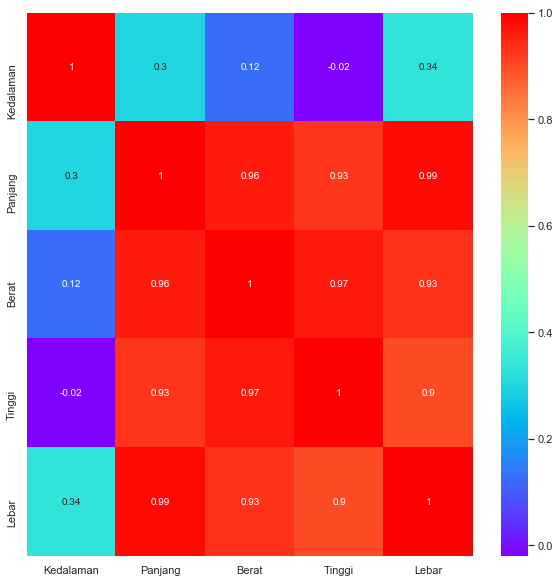

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(kerapu.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [13]:
kerapu.drop("Kedalaman", axis=1, inplace=True)
kerapu.head()

,jenis,Panjang,Berat,Tinggi,Lebar
0,E_ongus,22.7,150.0,8.6,2.8
1,E_ongus,24.7,170.0,9.8,3.2
2,E_ongus,22.5,148.0,8.4,2.8
3,E_ongus,22.6,151.0,8.5,2.8
4,E_ongus,23.5,163.0,9.0,2.8


In [14]:
X = kerapu[['Panjang', 'Berat', 'Tinggi', 'Lebar']]
X.head()

,Panjang,Berat,Tinggi,Lebar
0,22.7,150.0,8.6,2.8
1,24.7,170.0,9.8,3.2
2,22.5,148.0,8.4,2.8
3,22.6,151.0,8.5,2.8
4,23.5,163.0,9.0,2.8


In [15]:
from sklearn import preprocessing

s_scaler = preprocessing.MinMaxScaler()
df_s = s_scaler.fit_transform(X)

df = pd.DataFrame(df_s, columns= X.columns)
df.head()

,Panjang,Berat,Tinggi,Lebar
0,0.097938,0.046512,0.127907,0.142857
1,0.201031,0.093023,0.267442,0.257143
2,0.087629,0.041860,0.104651,0.142857
3,0.092784,0.048837,0.116279,0.142857
4,0.139175,0.076744,0.174419,0.142857


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

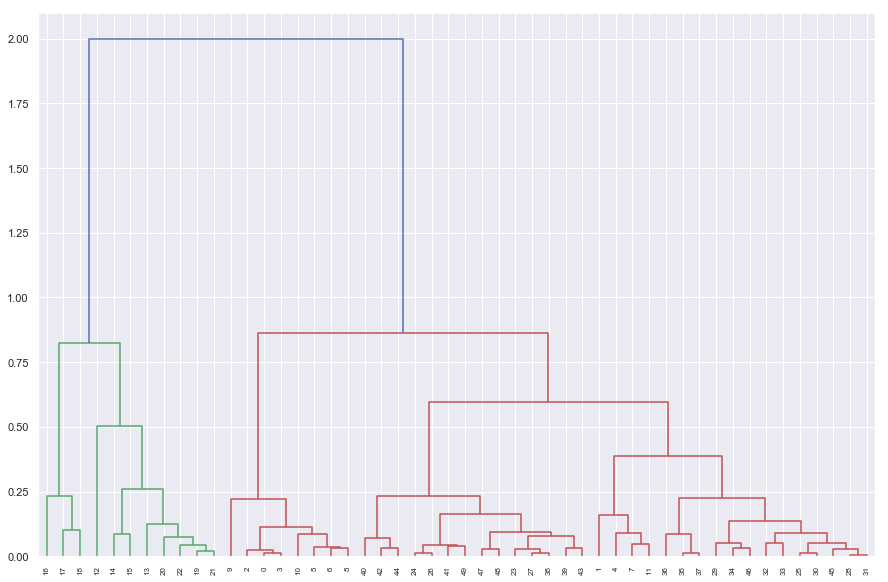

In [17]:
plt.figure(figsize = (15, 10))
dendrogram(linkage(df, method="complete", metric='euclidean'))
plt.savefig('dendogram.png')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean')
agglo.fit(df)

labels = agglo.labels_
hasil_agglo = pd.concat([kerapu, pd.DataFrame({'cluster':labels})], axis = 1)
hasil_agglo.head()

,jenis,Panjang,Berat,Tinggi,Lebar,cluster
0,E_ongus,22.7,150.0,8.6,2.8,2
1,E_ongus,24.7,170.0,9.8,3.2,2
2,E_ongus,22.5,148.0,8.4,2.8,2
3,E_ongus,22.6,151.0,8.5,2.8,2
4,E_ongus,23.5,163.0,9.0,2.8,2


In [20]:
hasil_agglo.sample(10)

,jenis,Panjang,Berat,Tinggi,Lebar,cluster
33,E_sexfasciatus,27.7,236.0,8.9,3.4,1
4,E_ongus,23.5,163.0,9.0,2.8,2
16,E_fuscoguttatus,40.2,560.0,16.1,5.8,0
30,E_sexfasciatus,27.4,238.0,8.7,3.7,1
9,E_ongus,20.8,130.0,7.5,2.3,2
3,E_ongus,22.6,151.0,8.5,2.8,2
34,E_sexfasciatus,26.5,226.0,8.3,3.5,1
46,E_areolatus,26.8,231.0,8.5,3.5,1
2,E_ongus,22.5,148.0,8.4,2.8,2
49,E_areolatus,28.4,247.0,9.5,3.8,1


In [21]:
agglo = AgglomerativeClustering(n_clusters = 3)
agglo.fit(df)

labels = agglo.labels_
hasil_agglo = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
hasil_agglo.head()

,Panjang,Berat,Tinggi,Lebar,cluster
0,0.097938,0.046512,0.127907,0.142857,2
1,0.201031,0.093023,0.267442,0.257143,2
2,0.087629,0.041860,0.104651,0.142857,2
3,0.092784,0.048837,0.116279,0.142857,2
4,0.139175,0.076744,0.174419,0.142857,2


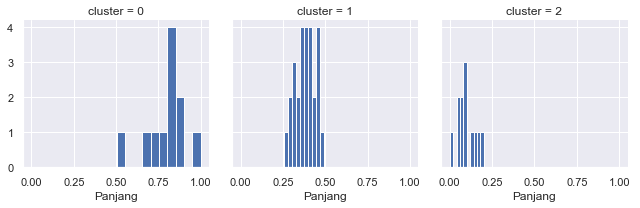

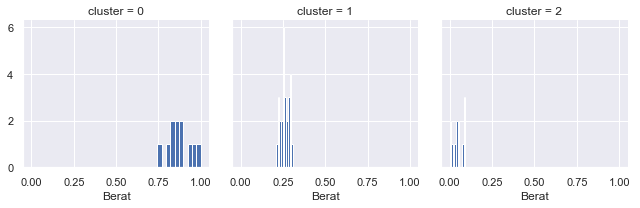

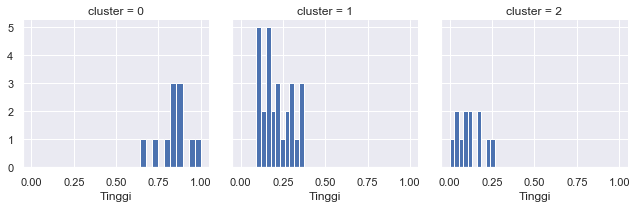

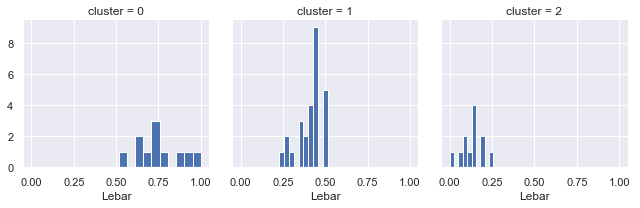

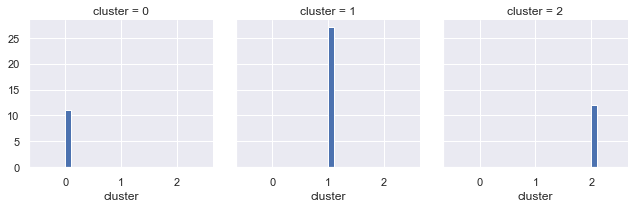

In [22]:
for i in hasil_agglo:
    grid = sns.FacetGrid(hasil_agglo, col = 'cluster')
    grid.map(plt.hist, i)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca1 = pca.fit_transform(df)

In [24]:
pca1

array([[-5.34826838e-01,  1.04679684e-01],
       [-3.37593889e-01,  8.66516370e-02],
       [-5.54688476e-01,  9.37830569e-02],
       [-5.42140355e-01,  1.00362872e-01],
       [-4.73606689e-01,  1.22573606e-01],
       [-6.15260439e-01,  8.12158749e-02],
       [-6.20568608e-01,  1.04911814e-01],
       [-4.28382714e-01,  8.80000376e-02],
       [-6.33818407e-01,  1.06935157e-01],
       [-7.35476589e-01,  1.45078201e-01],
       [-6.32302935e-01,  1.57990470e-01],
       [-3.96136248e-01,  1.13157334e-01],
       [ 4.78691805e-01,  1.83222897e-01],
       [ 8.62089319e-01,  1.31530570e-01],
       [ 7.03280959e-01,  9.86858036e-02],
       [ 7.79764351e-01,  1.09392230e-01],
       [ 1.25252711e+00, -4.65847226e-02],
       [ 1.11166708e+00, -1.62549377e-02],
       [ 1.03302205e+00,  9.90475708e-03],
       [ 8.95230793e-01,  5.62744941e-02],
       [ 9.51433124e-01,  5.02946584e-02],
       [ 8.77635617e-01,  5.08109491e-02],
       [ 8.87656162e-01,  7.45373512e-02],
       [ 4.

In [25]:
PCA_dataset1 = pd.DataFrame(data = pca1, columns = ['component1', 'component2'] )
PCA_dataset1.sample(10)

,component1,component2
21,0.877636,0.050811
19,0.895231,0.056274
9,-0.735477,0.145078
23,0.000462,-0.094850
25,-0.184919,-0.097689
27,-0.024610,-0.096950
35,-0.287752,-0.042803
31,-0.157581,-0.090157
38,-0.012061,-0.090370
20,0.951433,0.050295


In [26]:
pca_cluster = agglo.fit_predict(pca1)
pca_cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

C:\WPy64-3680\python-3.6.8.amd64\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\WPy64-3680\python-3.6.8.amd64\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\WPy64-3680\python-3.6.8.amd64\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\WPy64-3680\python-3.6.8.amd64\lib\site-packages\matplotlib\cbook\__ini

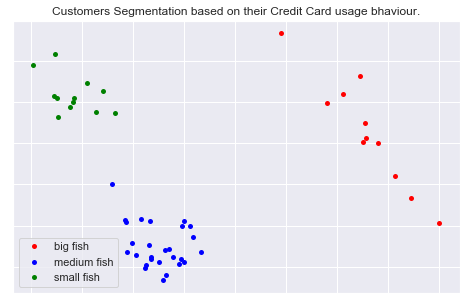

In [27]:
x, y = pca1[:, 0], pca1[:, 1]

warna = {0: 'red',
          1: 'blue',
          2: 'green'}
         
nama = {0: 'big fish', 
         1: 'medium fish', 
         2: 'small fish'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=warna[name],label=nama[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

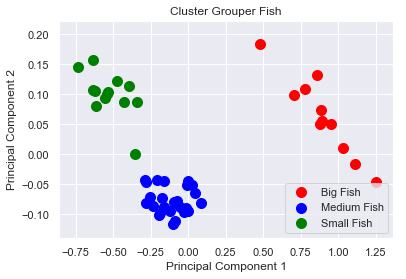

In [28]:
plt.scatter(pca1[pca_cluster == 0, 0], pca1[pca_cluster == 0, 1], s = 100, c = 'red', label = 'Big Fish')
plt.scatter(pca1[pca_cluster == 1, 0], pca1[pca_cluster == 1, 1], s = 100, c = 'blue', label = 'Medium Fish')
plt.scatter(pca1[pca_cluster == 2, 0], pca1[pca_cluster == 2, 1], s = 100, c = 'green', label = 'Small Fish')
plt.title('Cluster Grouper Fish')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'lower right')
plt.savefig('clusterpca.png')
plt.show()

In [29]:
kerapu.tail(10)

,jenis,Panjang,Berat,Tinggi,Lebar
40,E_areolatus,30.4,263.0,10.7,4.1
41,E_areolatus,28.1,246.0,9.2,3.8
42,E_areolatus,29.9,256.0,10.6,4.0
43,E_areolatus,28.9,243.0,9.7,3.8
44,E_areolatus,29.8,258.0,10.5,3.9
45,E_areolatus,27.9,239.0,9.0,3.6
46,E_areolatus,26.8,231.0,8.5,3.5
47,E_areolatus,29.8,251.0,10.4,3.8
48,E_areolatus,29.6,257.0,10.2,3.8
49,E_areolatus,28.4,247.0,9.5,3.8


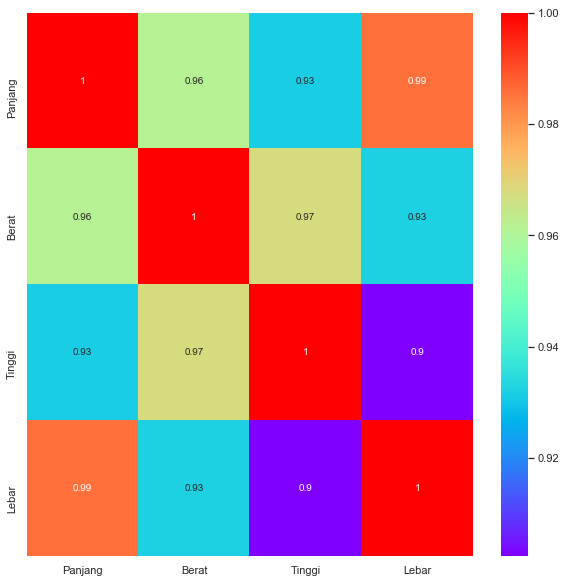

In [30]:
plt.figure(figsize = (10, 10))
sns.heatmap(kerapu.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

# Multiple Linear Regression

In [31]:
kerapu.head()

,jenis,Panjang,Berat,Tinggi,Lebar
0,E_ongus,22.7,150.0,8.6,2.8
1,E_ongus,24.7,170.0,9.8,3.2
2,E_ongus,22.5,148.0,8.4,2.8
3,E_ongus,22.6,151.0,8.5,2.8
4,E_ongus,23.5,163.0,9.0,2.8


In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [33]:
res = ols(formula='Berat ~ Panjang + Tinggi + Lebar', data = kerapu).fit()
print(res.params)
print(res.summary())

Intercept   -398.574336
Panjang       19.193889
Tinggi        26.830912
Lebar        -40.106017
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Berat   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.41e-33
Time:                        08:57:38   Log-Likelihood:                -229.40
No. Observations:                  50   AIC:                             466.8
Df Residuals:                      46   BIC:                             474.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [34]:
res = ols(formula='Berat ~ Panjang + Tinggi', data = kerapu).fit()
print(res.params)
print(res.summary())

Intercept   -357.900492
Panjang       11.968075
Tinggi        28.381004
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Berat   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     623.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.46e-34
Time:                        08:57:38   Log-Likelihood:                -230.58
No. Observations:                  50   AIC:                             467.2
Df Residuals:                      47   BIC:                             472.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

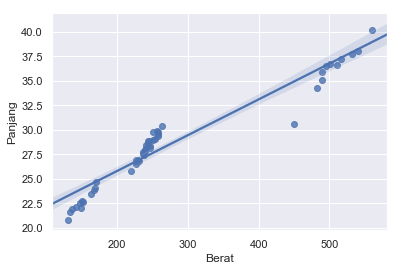

In [35]:
p = sns.regplot(kerapu.Berat, kerapu.Panjang)

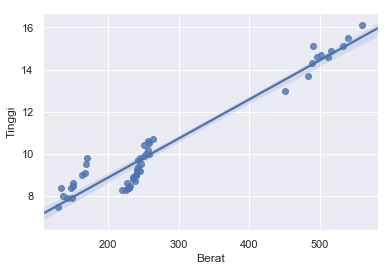

In [36]:
reg = sns.regplot(kerapu.Berat, kerapu.Tinggi)

In [37]:
res = ols(formula='Berat ~ np.log(Lebar)', data = kerapu).fit()
print(res.params)
print(res.summary())

Intercept       -429.072859
np.log(Lebar)    544.231220
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Berat   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           3.96e-19
Time:                        08:57:40   Log-Likelihood:                -271.47
No. Observations:                  50   AIC:                             546.9
Df Residuals:                      48   BIC:                             550.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [43]:
X = kerapu.drop(columns=['Berat', 'Lebar', 'jenis'])
Y = kerapu['Berat']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [45]:
print('Berapa banyak test and train datasets?')
print('X_train: ', np.shape(X_train))
print('Y_train: ', np.shape(Y_train))
print('X_test: ', np.shape(X_test))
print('Y_test: ', np.shape(Y_test))

Berapa banyak test and train datasets?
X_train:  (35, 2)
Y_train:  (35,)
X_test:  (15, 2)
Y_test:  (15,)


In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -363.46135634623744
Model coefficients:  [11.80467253 29.4061651 ]


In [48]:
print('Y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ')

Y = -363.46 + 11.80*X1 29.41*X2 


In [49]:
Y_head = reg.predict(X_train)

In [50]:
from sklearn.metrics import r2_score

r2_score(Y_train, Y_head)

0.9667498169003405

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, Y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[ 0.9518776   0.9933141   0.83568181  0.96149061  0.96687442  0.73490709
  0.93320831  0.9926221  -1.05019135  0.75949267]


In [52]:
cross_val_score_train.mean()

0.7079277357219158

In [53]:
Y_pred = reg.predict(X_test)

In [54]:
print(r2_score(Y_test, Y_pred))

0.9470055438831679


In [55]:
Y_pred1 = pd.DataFrame(Y_pred, columns=['Estimasi Berat'])
Y_pred1.head()

,Estimasi Berat
0,269.995182
1,198.735187
2,310.046655
3,274.116265
4,149.155562


In [56]:
Y_test1 = pd.DataFrame(Y_test)
Y_test1 = Y_test1.reset_index(drop=True)
Y_test1.head()

,Berat
0,251.0
1,228.0
2,263.0
3,254.0
4,148.0


In [57]:
ynew = pd.concat([Y_test1, Y_pred1], axis=1)
ynew

,Berat,Estimasi Berat
0,251.0,269.995182
1,228.0,198.735187
2,263.0,310.046655
3,254.0,274.116265
4,148.0,149.155562
5,151.0,153.276646
6,257.0,285.899835
7,227.0,206.977355
8,231.0,202.856271
9,240.0,230.544493


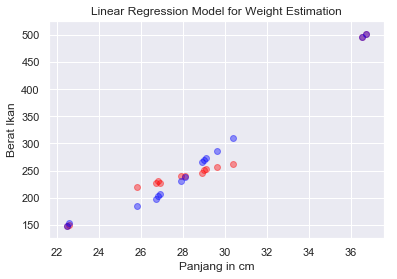

In [58]:
plt.scatter(X_test['Panjang'], Y_test, color='red', alpha=0.4)
plt.scatter(X_test['Panjang'], Y_pred, color='blue', alpha=0.4)
plt.xlabel('Panjang in cm')
plt.ylabel('Berat Ikan')
plt.title('Linear Regression Model for Weight Estimation');

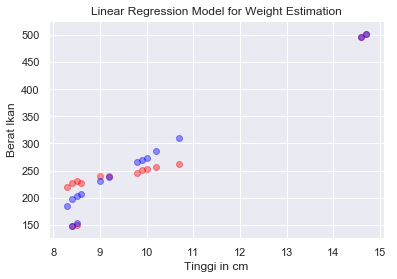

In [59]:
plt.scatter(X_test['Tinggi'], Y_test, color='red', alpha=0.4)
plt.scatter(X_test['Tinggi'], Y_pred, color='blue', alpha=0.4)
plt.xlabel('Tinggi in cm')
plt.ylabel('Berat Ikan')
plt.title('Linear Regression Model for Weight Estimation');